In [43]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import networkx as nx


## Clustering of Similar resource activity

In [44]:
resource_activity_df = pd.read_csv("outputs_task_similarity_nb/resource_activity_mean_per_case.csv")

In [45]:
values = resource_activity_df.pop('resource')

In [46]:

K = 5
kmeans = KMeans(n_clusters=K, random_state=2325)
kmeans.fit(resource_activity_df.values )


,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,2325
,copy_x,True
,algorithm,'lloyd'


In [47]:
resource_cluster = dict(zip(values, kmeans.labels_))

parsing log, completed traces :: 100%|██████████| 3093/3093 [00:08<00:00, 375.27it/s]


Log imported with 124866 traces.
Nodes: 134, Edges: 1011


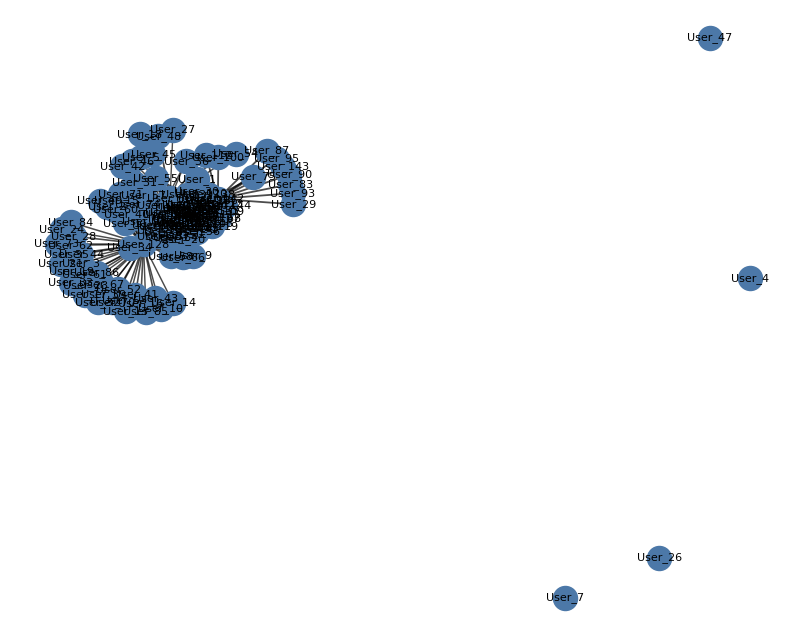

Process Completed


In [48]:
from Assignment_1_1 import main

G = main("BPI2017Denied(3).xes", metric='cosine_distance', threshold_value=.85)

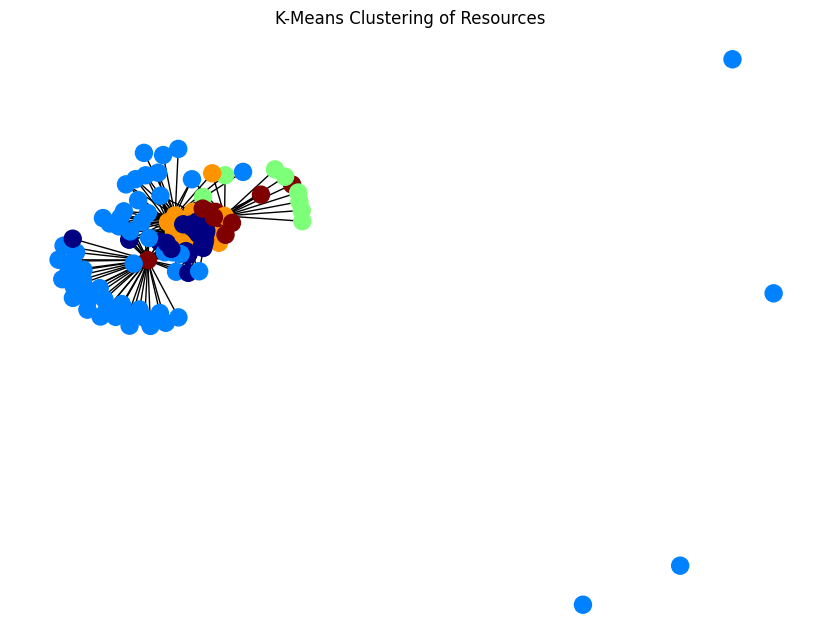

In [49]:
import matplotlib.pyplot as plt

# Get positions for the nodes in the graph
pos = nx.spring_layout(G, seed=42)

# Get the cluster assignments for each node
node_colors = [resource_cluster[(node)] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_color=node_colors, cmap=plt.cm.jet, node_size=150, font_size=0, font_color='white')
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('K-Means Clustering of Resources')
plt.show()

## Hierarchical

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering using the 'ward' linkage method
# Linkage computes the distance matrix between clusters
linked = linkage(resource_activity_df.values, method='ward')


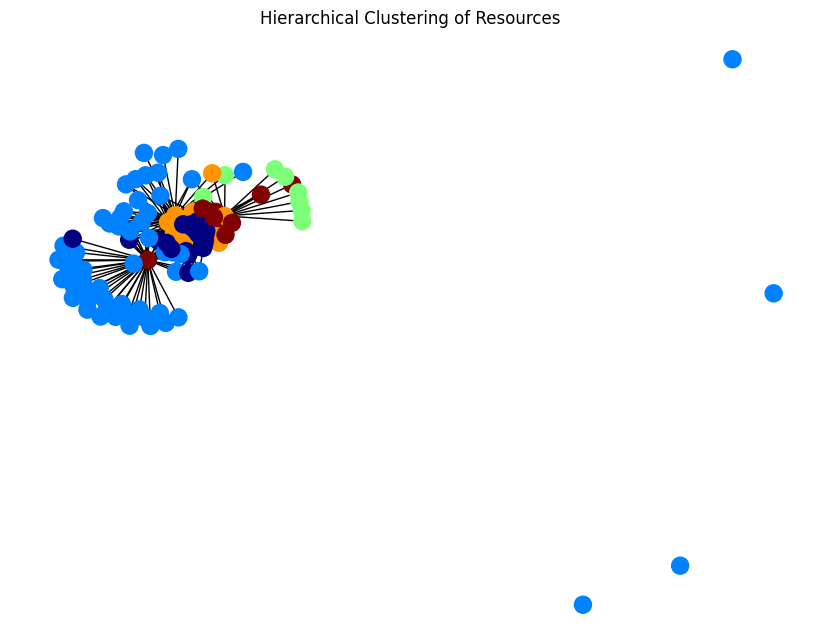

In [56]:
num_clusters = 4
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

resource_cluster = dict(zip(values, kmeans.labels_))
import matplotlib.pyplot as plt

# Get positions for the nodes in the graph
pos = nx.spring_layout(G, seed=42)

# Get the cluster assignments for each node
node_colors = [resource_cluster[(node)] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_color=node_colors, cmap=plt.cm.jet, node_size=150, font_size=0, font_color='white')
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Hierarchical Clustering of Resources')
plt.show()